<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter07_working_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.2 케라스 모델을 만드는 여러 방법

### 7.2.1 Sequential 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Sequential 클래스

model = keras.Sequential([
		layers.Dense(64, activation="relu"),
		layers.Dense(10, activation="softmax")
])

In [3]:
# 점진적으로 Sequential 모델 만들기

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [5]:
# 가중치를 만들기 위해 모델을 호출한다.

model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.22055203, -0.26078784, -0.02506742, -0.14647342,  0.2142241 ,
          0.2087093 ,  0.07966855, -0.25765368,  0.03604302, -0.05475494,
          0.14114982,  0.11016515, -0.04934002, -0.14199394,  0.08396238,
         -0.07385914, -0.2026835 , -0.1828621 ,  0.23372388,  0.261079  ,
          0.09604234,  0.23588818, -0.2561474 ,  0.07210934, -0.22908162,
          0.1067501 ,  0.22754234,  0.27530533,  0.15393078, -0.22126308,
          0.05643702, -0.04875582, -0.21040529,  0.02489939, -0.11673717,
          0.08784002,  0.01129523, -0.05980121,  0.10522056,  0.26820934,
          0.0777458 ,  0.15508184, -0.18444766,  0.28616786,  0.21871668,
         -0.04066497,  0.07839236, -0.04909253,  0.15892026,  0.0497517 ,
          0.04688868,  0.22992742, -0.25452933, -0.16420062,  0.2023958 ,
         -0.1179333 ,  0.1958332 ,  0.1513966 , -0.18372248, -0.22003925,
         -0.1473054 ,  0.17428628, -0.05511

In [6]:
# summary() 메서드

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# name 매개변수로 모델과 층에 이름 지정하기

model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 모델의 입력 크기를 미리 지정하기

model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # 배치 크기가 아니라 각 샘플의 크기이어야 함
model.add(layers.Dense(64, activation="relu"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7.2.2 함수형 API

#### 간단한 예제

In [17]:
# 2개의 Dense 층을 가진 간단한 함수형 모델

inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
# Input 클래스 객체를 정의

inputs = keras.Input(shape=(3,), name="my_input")

In [19]:
inputs.shape

TensorShape([None, 3])

In [20]:
inputs.dtype

tf.float32

In [21]:
features = layers.Dense(64, activation="relu")(inputs)

In [22]:
features.shape

TensorShape([None, 64])

In [23]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                256       
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 다중 입력, 다중 출력 모델

In [26]:
# 다중 입력, 다중 출력 함수형 모델

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])


#### 다중 입력, 다중 출력 모델 훈련하기

In [27]:
import numpy as np

In [33]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

num_samples = 1280

# 더미(dummy) 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 더미(dummy) 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step


In [36]:
# 입력과 타깃 배열을 딕션너리로 전달하여 모델 훈련하기

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


#### 함수형 API의 장점: 층 연결 구조 활용하기

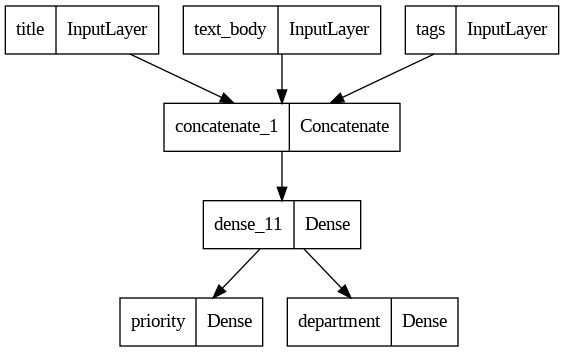

In [37]:
keras.utils.plot_model(model, "ticket_classifier.png")

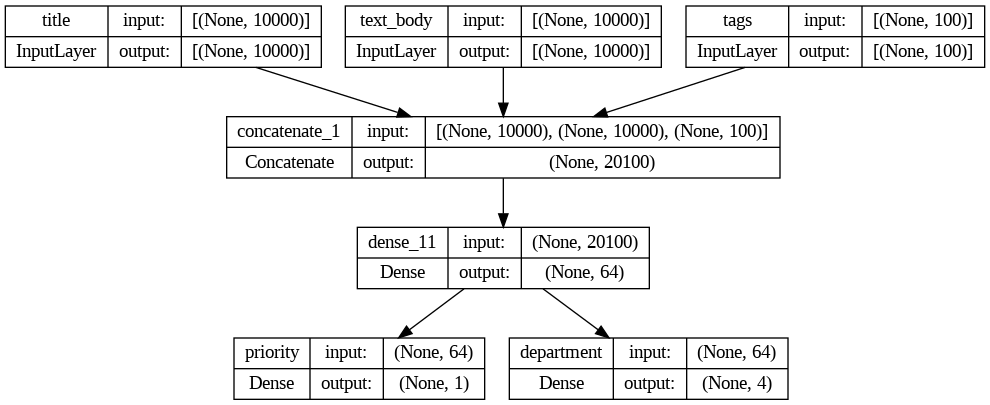

In [39]:
# 모델에 있는 각 층의 입출력 크기 추가

keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [40]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기

model.layers

In [41]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [45]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기

model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

In [46]:
# 중간층의 출력을 재사용해서 새로운 모델 만들기

features = model.layers[4].output # layers[4]는 중간 Dense 층이다.
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs = [priority, department, difficulty])

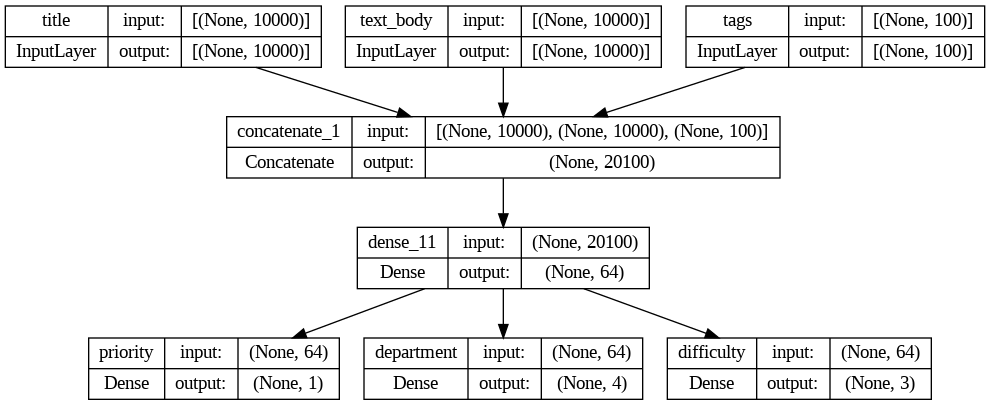

In [47]:
keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes=True)

### 7.2.3 Model 서브클래싱

#### 이전 예제를 서브클래싱 모델로 다시 만들기

In [50]:
# 간단한 서브클래싱 모델

class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()    # 부모 클래스의 생성자를 호출
    self.concat_layer = layers.Concatenate()    # 생성자에서 층을 정의
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(    # 생성자에서 층을 정의
        num_departments, activation="softmax")

  def call(self, inputs):   # call() 메서드에서 정방향 패스를 정의
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department